## Setup

In [ ]:
# !pip unistall keras

In [ ]:
# !pip install keras==2.6.0


In [ ]:
!pip install keras==2.12.0

In [ ]:
!pip install --upgrade keras jax jaxlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
y
Y
  Successfully uninstalled tensorflow-2.15.0


In [ ]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 33.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 require

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "jax"  # @param ["tensorflow", "jax", "torch"]

import keras
from keras import layers
from keras import ops

import numpy as np
import matplotlib.pyplot as plt

## Prepare the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Fire Risk/2_fire_pred (1).zip'

unzip:  cannot find or open /content/drive/MyDrive/Fire Risk/2_fire_pred (1).zip, /content/drive/MyDrive/Fire Risk/2_fire_pred (1).zip.zip or /content/drive/MyDrive/Fire Risk/2_fire_pred (1).zip.ZIP.


In [ ]:
import os

In [ ]:
train_dir= '/content/2_fire_pred/2_fire_pred/train'
test_dir= '/content/2_fire_pred/2_fire_pred/test'
valid_dir= '/content/2_fire_pred/2_fire_pred/valid'

test_nowildfire_dir= '/content/2_fire_pred/2_fire_pred/test/nowildfire'
test_wildfire_dir= '/content/2_fire_pred/2_fire_pred/test/wildfire'

valid_nowildfire_dir= '/content/2_fire_pred/2_fire_pred/train/nowildfire'
valid_wildfire_dir= '/content/2_fire_pred/2_fire_pred/valid/wildfire'

train_nowildfire_dir= '/content/2_fire_pred/2_fire_pred/train/nowildfire'
train_wildfire_dir= '/content/2_fire_pred/2_fire_pred/train/wildfire'

print('Total train nowildfire image:',len(os.listdir(train_nowildfire_dir)))
print('Total train wildfire image:',len(os.listdir(train_wildfire_dir)))
print('Total test nowildfire image:',len(os.listdir(test_nowildfire_dir)))
print('Total test wildfire image:',len(os.listdir(test_wildfire_dir)))
print('Total val nowildfire image:',len(os.listdir(valid_nowildfire_dir)))
print('Total val wildfire image:',len(os.listdir(valid_wildfire_dir)))

Total train nowildfire image: 4000
Total train wildfire image: 4000
Total test nowildfire image: 500
Total test wildfire image: 500
Total val nowildfire image: 4000
Total val wildfire image: 500


In [ ]:

# num_classes = 2
# input_shape = (224,224, 3)

# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

# print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
# print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")


## Configure the hyperparameters

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Image dimensions and batch size
img_width, img_height = 224,224
batch_size = 256

# Data generators with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    # shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directories and generate batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    # batch_size=batch_size,
    class_mode='binary', # Assumes binary classification
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_width, img_height),
    # batch_size=batch_size,
    class_mode='binary', # Assumes binary classification
    shuffle=True

)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    # batch_size=batch_size,
    class_mode='binary', # Assumes binary classification
    shuffle=True
)

Found 8000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# batch_size = 256

# # Define the augmentation parameters
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True
# )

# # Flow images from the train directory, specifying the classes
# train_generator = datagen.flow_from_directory(
#     train_dir,
#     # target_size=(image_size, image_size),
#     batch_size=batch_size,
#     class_mode='binary',  # Assumes binary classification
#     shuffle=True
# )


In [ ]:
# Assuming you have a train generator named train_generator

# Get the shape of the first batch of images from the generator
first_batch = next(train_generator)
input_shape = first_batch[0].shape  # Assuming images are stored as the first element of each batch

# Extract the height (or width) and store it in a variable
image_size = input_shape[1]  # Extracting the height
width = input_shape[2]   # Extracting the width

print("Height of the image:", image_size)
print("Width of the image:", width)

input_shape = input_shape[1:]
print(input_shape)

Height of the image: 224
Width of the image: 224
(224, 224, 3)


In [ ]:
learning_rate = 0.001
weight_decay = 0.0001

num_epochs = 10
# image_size = 72
patch_size = 8  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 8
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 6
mlp_head_units = [
    512,
    128,
]  # Size of the dense layers of the final classifier


In [ ]:
# test_generator = datagen.flow_from_directory(
#     test_dir,
#     target_size=(image_size, image_size),
#     batch_size=batch_size,
#     class_mode='binary',  # Assumes binary classification
#     shuffle=True
# )
# valid_generator = datagen.flow_from_directory(
#     valid_dir,
#     target_size=(image_size, image_size),
#     batch_size=batch_size,
#     class_mode='binary',  # Assumes binary classification
#     shuffle=True
# )

## Use data augmentation

In [ ]:
# from keras import layers

# def dense_block(x, num_layers, growth_rate):
#     """Create a dense block."""
#     for _ in range(num_layers):
#         y = layers.BatchNormalization()(x)
#         y = layers.Activation('swish')(y)
#         y = layers.Conv2D(4 * growth_rate, 1, padding='same')(y)
#         y = layers.BatchNormalization()(y)
#         y = layers.Activation('swish')(y)
#         y = layers.Conv2D(growth_rate, 3, padding='same')(y)
#         x = layers.Concatenate()([x, y])
#     return x

# def transition_block(x, compression_factor):
#     """Create a transition block."""
#     num_channels = int(x.shape[-1])
#     num_channels = int(num_chananels * compression_factor)
#     x = layers.BatchNormalization()(x)
#     x = layers.Conv2D(num_channels, 1, activation='swish')(x)
#     x = layers.AveragePooling2D(2)(x)
#     return x


In [ ]:
# !pip install tensorflow

In [ ]:
# import tensorflow as tf

In [ ]:
# # Define DenseNet convolutional layers without data augmentation
# data_augmentation = keras.Sequential(name="data_augmentation")

# # Pass a dummy input to define the output shape of data_augmentation
# dummy_input = tf.keras.layers.Input(shape=(img_width, img_height, 3))
# data_aug_output = data_augmentation(dummy_input)

# # Define DenseNet convolutional layers
# data_augmentation.add(layers.Conv2D(64, 7, strides=2, padding="same", activation="swish"))
# data_augmentation.add(layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="same"))

# # Dense Block 1
# num_channels = 64
# growth_rate = 32
# num_dense_blocks = 4
# for _ in range(num_dense_blocks):
#     data_augmentation.add(dense_block(data_aug_output, num_layers=4, growth_rate=32))  # Adjust num_layers and growth_rate as needed
#     num_channels += num_dense_blocks * growth_rate
#     data_augmentation.add(transition_block(data_aug_output, compression_factor=0.5))

# # Dense Block 2
# num_channels = 128
# growth_rate = 32
# num_dense_blocks = 8
# for _ in range(num_dense_blocks):
#     data_augmentation.add(dense_block(data_aug_output, num_layers=4, growth_rate=32))  # Adjust num_layers and growth_rate as needed
#     num_channels += num_dense_blocks * growth_rate
#     data_augmentation.add(transition_block(data_aug_output, compression_factor=0.5))

# # Dense Block 3
# num_channels = 256
# growth_rate = 32
# num_dense_blocks = 12
# for _ in range(num_dense_blocks):
#     data_augmentation.add(dense_block(data_aug_output, num_layers=4, growth_rate=32))  # Adjust num_layers and growth_rate as needed
#     num_channels += num_dense_blocks * growth_rate
#     data_augmentation.add(transition_block(data_aug_output, compression_factor=0.5))

# # Dense Block 4
# num_channels = 512
# growth_rate = 32
# num_dense_blocks = 16
# for _ in range(num_dense_blocks):
#     data_augmentation.add(dense_block(data_aug_output, num_layers=4, growth_rate=32))  # Adjust num_layers and growth_rate as needed
#     num_channels += num_dense_blocks * growth_rate
#     if num_channels < 1024:  # Last block does not have a transition layer
#         data_augmentation.add(transition_block(data_aug_output, compression_factor=0.5))

# data_augmentation.add(layers.GlobalAveragePooling2D())


## Implement multilayer perceptron (MLP)

In [ ]:

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.swish)(x) #using swish activation function
        x = layers.Dropout(dropout_rate)(x)
    return x


## Implement patch creation as a layer

In [ ]:

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config


Let's display patches for a sample image

Image size: 224 X 224
Patch size: 8 X 8
Patches per image: 784
Elements per patch: 192


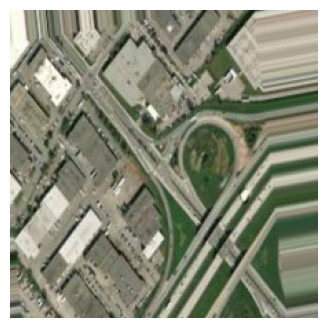

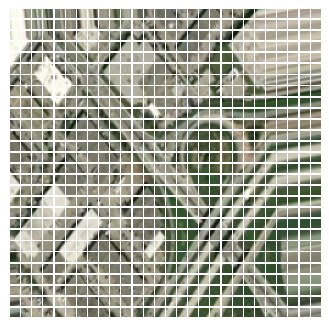

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of images from the train generator
batch = next(train_generator)

plt.figure(figsize=(4, 4))
# Display a random image from the batch
image = batch[0][np.random.choice(range(batch[0].shape[0]))]
plt.imshow(image)
plt.axis("off")

# Assuming 'ops' and 'Patches' are already defined in your code
resized_image = ops.image.resize(
    ops.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = ops.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(ops.convert_to_numpy(patch_img))
    plt.axis("off")

plt.show()


In [ ]:
# plt.figure(figsize=(4, 4))
# image = x_train[np.random.choice(range(x_train.shape[0]))]
# plt.imshow(image.astype("uint8"))
# plt.axis("off")

# resized_image = ops.image.resize(
#     ops.convert_to_tensor([image]), size=(image_size, image_size)
# )
# patches = Patches(patch_size)(resized_image)
# print(f"Image size: {image_size} X {image_size}")
# print(f"Patch size: {patch_size} X {patch_size}")
# print(f"Patches per image: {patches.shape[1]}")
# print(f"Elements per patch: {patches.shape[-1]}")

# n = int(np.sqrt(patches.shape[1]))
# plt.figure(figsize=(4, 4))
# for i, patch in enumerate(patches[0]):
#     ax = plt.subplot(n, n, i + 1)
#     patch_img = ops.reshape(patch, (patch_size, patch_size, 3))
#     plt.imshow(ops.convert_to_numpy(patch_img).astype("uint8"))
#     plt.axis("off")

## Implement the patch encoding layer

The `PatchEncoder` layer will linearly transform a patch by projecting it into a
vector of size `projection_dim`. In addition, it adds a learnable position
embedding to the projected vector.

In [ ]:

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = ops.expand_dims(
            ops.arange(start=0, stop=self.num_patches, step=1), axis=0
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config


## Build the ViT model

The ViT model consists of multiple Transformer blocks,
which use the `layers.MultiHeadAttention` layer as a self-attention mechanism
applied to the sequence of patches. The Transformer blocks produce a
`[batch_size, num_patches, projection_dim]` tensor, which is processed via an
classifier head with softmax to produce the final class probabilities output.

Unlike the technique described in the [paper](https://arxiv.org/abs/2010.11929),
which prepends a learnable embedding to the sequence of encoded patches to serve
as the image representation, all the outputs of the final Transformer block are
reshaped with `layers.Flatten()` and used as the image
representation input to the classifier head.
Note that the `layers.GlobalAveragePooling1D` layer
could also be used instead to aggregate the outputs of the Transformer block,
especially when the number of patches and the projection dimensions are large.

In [ ]:
# import keras.applications
# import tensorflow.keras.applications

In [ ]:
# input_shape = (224,224)

In [ ]:
num_classes = 2

In [ ]:
from keras.applications import DenseNet121

def create_densenet_classifier():
    # Load pre-trained DenseNet model without the top classification layers
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the convolutional base
    base_model.trainable = False

    # Create input layer
    inputs = keras.Input(shape=input_shape)

    # Augment data
    # augmented = data_augmentation(inputs)

    # Preprocess inputs for DenseNet
    # preprocessed = keras.applications.densenet.preprocess_input(augmented)

    # Pass preprocessed inputs through the DenseNet base model
    base_output = base_model(inputs)

    # Global average pooling layer
    pooled_output = layers.GlobalAveragePooling2D()(base_output)

    # Add a fully connected layer with dropout
    features = layers.Dropout(0.5)(pooled_output)

    # Classify outputs
    logits = layers.Dense(num_classes)(features)

    # Create the Keras model
    model = keras.Model(inputs=inputs, outputs=logits)

    return model

# Create DenseNet classifier model
model = create_densenet_classifier()


HYPERPARAMETER TUNING

In [ ]:
# !pip uninstall keras

Found existing installation: keras 2.7.0
Uninstalling keras-2.7.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-2.7.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? y
  Successfully uninstalled keras-2.7.0


In [ ]:
# !pip uninstall tensorflow

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.15.0


In [ ]:
# !pip install keras==2.7.0
# !pip install tensorflow==2.12.0

  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.6 MB/s eta 0:00:00
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 45.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
     

In [ ]:

# # !pip install --upgrade keras jax jaxlib
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [ ]:

# def create_vit_classifier():
#     inputs = keras.Input(shape=input_shape)
#     # Augment data.
#     augmented = data_augmentation(inputs)
#     # Create patches.
#     patches = Patches(patch_size)(augmented)
#     # Encode patches.
#     encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

#     # Create multiple layers of the Transformer block.
#     for _ in range(transformer_layers):
#         # Layer normalization 1.
#         x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
#         # Create a multi-head attention layer.
#         attention_output = layers.MultiHeadAttention(
#             num_heads=num_heads, key_dim=projection_dim, dropout=0.1
#         )(x1, x1)
#         # Skip connection 1.
#         x2 = layers.Add()([attention_output, encoded_patches])
#         # Layer normalization 2.
#         x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
#         # MLP.
#         x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
#         # Skip connection 2.
#         encoded_patches = layers.Add()([x3, x2])

#     # Create a [batch_size, projection_dim] tensor.
#     representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
#     representation = layers.Flatten()(representation)
#     representation = layers.Dropout(0.5)(representation)
#     # Add MLP.
#     features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
#     # Classify outputs.
#     logits = layers.Dense(num_classes)(features)
#     # Create the Keras model.
#     model = keras.Model(inputs=inputs, outputs=logits)
#     return model


## Compile, train, and evaluate the mode

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping
def run_experiment(model):
    optimizer = keras.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay,

    )
    # Change the k value to 2 in the SparseTopKCategoricalAccuracy metric
    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(2, name="top-2-accuracy"),
        ],

    )




    # Define EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=50,
        validation_data=valid_generator,
        validation_steps=valid_generator.samples // batch_size,
        callbacks=[early_stopping]
    )


    # # model.load_weights(checkpoint_filepath)
    # _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    # print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    # print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


# vit_classifier = create_vit_classifier()
dense_classifier = create_densenet_classifier()
history = run_experiment(dense_classifier)



# plot_history("loss")
# plot_history("top-5-accuracy")


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4904 - loss: 1.0667 - top-2-accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 268s 8s/step - accuracy: 0.4933 - loss: 1.0598 - top-2-accuracy: 1.0000 - val_accuracy: 0.8333 - val_loss: 0.3897 - val_top-2-accuracy: 1.0000
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 241s 8s/step - accuracy: 0.7247 - loss: 0.5592 - top-2-accuracy: 1.0000 - val_accuracy: 0.9062 - val_loss: 0.2654 - val_top-2-accuracy: 1.0000
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 239s 8s/step - accuracy: 0.8060 - loss: 0.4102 - top-2-accuracy: 1.0000 - val_accuracy: 0.9167 - val_loss: 0.2133 - val_top-2-accuracy: 1.0000
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 236s 8s/step - accuracy: 0.8342 - loss: 0.3856 - top-2-accuracy: 1.0000 - val_accuracy: 0.9271 - val_loss: 0.2146 - val_top-2-accuracy: 1.0000
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 233s 8s/step - accuracy: 0.8317 - loss: 0.3605 - top-2-accuracy: 1.0000 - val_accuracy: 0.9688 - val_loss: 0.1280 - val_top-2-accuracy: 1.0000
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 239s 8s/step - accuracy: 0.8678 - loss: 0.3331 - top-2-accuracy: 1.0

/usr/local/lib/python3.10/dist-packages/keras/src/backend/jax/trainer.py:406: UserWarning: Your input ran out of data; interrupting epoch. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  for step, data in epoch_iterator.enumerate_epoch():


31/31 ━━━━━━━━━━━━━━━━━━━━ 26s 636ms/step - accuracy: 0.8438 - loss: 0.3508 - top-2-accuracy: 1.0000 - val_accuracy: 0.9583 - val_loss: 0.1362 - val_top-2-accuracy: 1.0000
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 235s 8s/step - accuracy: 0.8846 - loss: 0.2805 - top-2-accuracy: 1.0000 - val_accuracy: 0.9583 - val_loss: 0.1443 - val_top-2-accuracy: 1.0000


In [ ]:

def plot_history(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


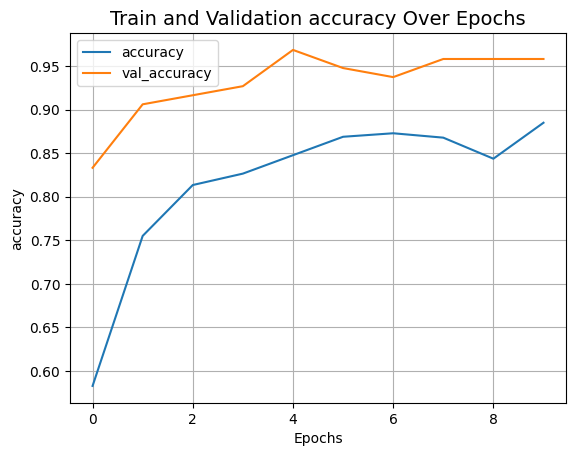

In [ ]:

plot_history("accuracy")
# plot_history("top-5-accuracy")

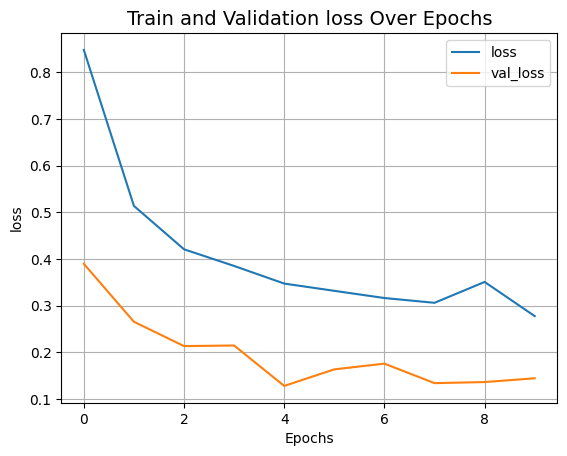

In [ ]:

plot_history("loss")
# plot_history("top-5-accuracy")

After 100 epochs, the ViT model achieves around 55% accuracy and
82% top-5 accuracy on the test data. These are not competitive results on the CIFAR-100 dataset,
as a ResNet50V2 trained from scratch on the same data can achieve 67% accuracy.

Note that the state of the art results reported in the
[paper](https://arxiv.org/abs/2010.11929) are achieved by pre-training the ViT model using
the JFT-300M dataset, then fine-tuning it on the target dataset. To improve the model quality
without pre-training, you can try to train the model for more epochs, use a larger number of
Transformer layers, resize the input images, change the patch size, or increase the projection dimensions.
Besides, as mentioned in the paper, the quality of the model is affected not only by architecture choices,
but also by parameters such as the learning rate schedule, optimizer, weight decay, etc.
In practice, it's recommended to fine-tune a ViT model
that was pre-trained using a large, high-resolution dataset.

In [ ]:
# Evaluating the model

test_loss, test_acc = dense_classifier.evaluate(test_generator) #batch size = 32
print('Test accuracy:', test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 220s 7s/step - accuracy: 0.9373 - loss: 0.1859 - top-2-accuracy: 1.0000


ValueError: too many values to unpack (expected 2)

In [ ]:
# Evaluate the model on the test generator
evaluation = dense_classifier.evaluate(test_generator) #batch size = 32

# Extract the loss value and accuracy from the evaluation result
test_loss = evaluation[0]
test_acc = evaluation[1]

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


32/32 ━━━━━━━━━━━━━━━━━━━━ 210s 6s/step - accuracy: 0.9443 - loss: 0.1723 - top-2-accuracy: 1.0000
Test loss: 0.18009886145591736
Test accuracy: 0.9399999976158142


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
# model = tf.keras.models.load_model('path_to_your_model')

# Load and preprocess the input image
img_path = '/content/-123.183636,49.215589.jpg'
img = image.load_img(img_path, target_size=(image_size, image_size))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize pixel values

# Make a prediction
predictions = dense_classifier.predict(img_array)

# Interpret the prediction (e.g., for classification)
predicted_class = np.argmax(predictions[0])

# Print the predicted class
if predicted_class==0:
  print(f'There are less chances of Forest Fire to occur')
elif predicted_class==1:
  print(f'There are high chances of Forest Fire to occur')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
There are less chances of Forest Fire to occur


In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "/content/drive/MyDrive/Fire Risk/TModel1.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(dense_classifier, file)


AttributeError: Can't pickle local object 'Layer._initialize_tracker.<locals>.<lambda>'

In [ ]:
dense_classifier.save('/content/drive/MyDrive/Fire Risk/model1.h5')


ValueError: Unable to synchronously create dataset (name already exists)

In [ ]:
keras.saving.save_model(dense_classifier)


TypeError: save_model() missing 1 required positional argument: 'filepath'